In [1]:
from import_data import VectorFetcher

vf = VectorFetcher()

In [2]:
trainingData = {}
trainingData["X"] = vf.get_vectors(["shakespeare","marlowe"], "train")
trainingData["Y"] = [1,1,1,1,0,0,0]

In [4]:
import pandas as pd

pd.DataFrame.from_dict(trainingData)

,X,Y
0,"(0, 393)\t1\n (0, 397)\t1\n (0, 400)\t1\n ...",1
1,"(0, 393)\t1\n (0, 397)\t1\n (0, 400)\t1\n ...",1
2,"(0, 393)\t1\n (0, 397)\t1\n (0, 400)\t1\n ...",1
3,"(0, 393)\t1\n (0, 397)\t1\n (0, 400)\t1\n ...",1
4,"(0, 393)\t1\n (0, 397)\t1\n (0, 400)\t1\n ...",0
5,"(0, 393)\t1\n (0, 397)\t1\n (0, 400)\t1\n ...",0
6,"(0, 393)\t1\n (0, 397)\t1\n (0, 400)\t1\n ...",0


In [5]:
testingData = {}
testingData["X"] = vf.get_vectors(["shakespeare","marlowe"], "test")
testingData["Y"] = [1,1,1,0,0]

pd.DataFrame.from_dict(testingData)

,X,Y
0,"(0, 0)\t11\n (0, 1)\t8\n (0, 2)\t2\n (0, ...",1
1,"(0, 0)\t11\n (0, 1)\t8\n (0, 2)\t2\n (0, ...",1
2,"(0, 0)\t11\n (0, 1)\t8\n (0, 2)\t2\n (0, ...",1
3,"(0, 0)\t11\n (0, 1)\t8\n (0, 2)\t2\n (0, ...",0
4,"(0, 0)\t11\n (0, 1)\t8\n (0, 2)\t2\n (0, ...",0


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

models = [
    LogisticRegression(),
    RandomForestClassifier(),
    MultinomialNB()
]

for i in range(0, len(models)):
    models[i].fit(trainingData["X"], trainingData["Y"])

/home/workexp/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/workexp/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:

accuracy = [model.score(testingData["X"], testingData["Y"]) * 100 for model in models]
model_labels = [model.__class__.__name__ for model in models]


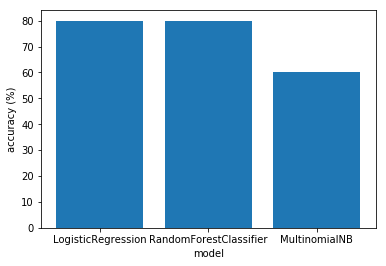

In [20]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

ind = index = np.arange(len(model_labels))
plt.bar(ind, accuracy)
plt.xlabel("model", fontsize=10)
plt.ylabel("accuracy (%)", fontsize=10)
plt.xticks(ind, model_labels)
plt.show()
